# Set up YOLOv4 Environment

In [1]:
!git clone https://github.com/roboflow-ai/pytorch-YOLOv4.git

Cloning into 'pytorch-YOLOv4'...
remote: Enumerating objects: 413, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 413 (delta 4), reused 4 (delta 1), pack-reused 401
Receiving objects: 100% (413/413), 932.48 KiB | 21.69 MiB/s, done.
Resolving deltas: 100% (231/231), done.


In [ ]:
def correct_file(filename, line_number, new_line):
    with open(filename, 'r') as f:
        lines = f.readlines()

    lines[line_number-1] = new_line + '\n'

    with open(filename, 'w') as f:
        f.writelines(lines)

In [ ]:
correct_file('/content/pytorch-YOLOv4/requirements.txt',2,"requests")

In [ ]:
%cd /content/pytorch-YOLOv4
!pip install -r requirements.txt
# This restarts the runtime--ignore any error messages
import os
os.kill(os.getpid(), 9)

/content/pytorch-YOLOv4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.9/28.9 MB 46.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.8/36.8 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 12.4 MB/s eta 0:00:00
  Created wheel for scikit_image: filename=scikit_image-0.16.2-cp39-cp39-linux_x86_64.whl size=44251171 sha256=bf62d7122d7c2494b1f766d3ce32ca851a24cca9b89fb82ed64e85e7079ea0ee
  Stored in directory: /root/.cache/pip/wheels/fe/20/5c/23218d242dbd520f9997774bab1fb0526e29db47

In [1]:
# download yolov4 weights that have already been converted to PyTorch
%cd /content/pytorch-YOLOv4/cfg/
!gdown https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA

/content/pytorch-YOLOv4/cfg
Downloading...
From: https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA
To: /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth
100% 170M/170M [00:02<00:00, 80.9MB/s]


# Download Custom Dataset

## Export Your Dataset from Roboflow

Roboflow enables you to export your dataset in any format you need - including for this notebook.

Create a [free account](https://app.roboflow.ai). Upload your private dataset. Generate a version (applying any preprocessing and augmentations you desire). Create an export. Select **YOLOv4 PyTorch** as the export format. Click **"Show Download code"**, copy your link, and paste it in the next cell. Magic.

In [2]:
%cd /content/
# REPLACE this link with your Roboflow dataset (export as YOLOv4 PyTorch format)
!curl -L "https://app.roboflow.com/ds/4jbIbgBLoK?key=Jzf6ZKJKKc" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   2604      0 --:--:-- --:--:-- --:--:--  2604
100 10.1M  100 10.1M    0     0  5049k      0  0:00:02  0:00:02 --:--:--  9.8M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/2-2_jpg.rf.0581cc2f8f7a47470799a752788c45e6.jpg  
 extracting: test/3-22_jpg.rf.5b9c43231589213af6fd5c8680ab877a.jpg  
 extracting: test/4-14_jpg.rf.2d7e72c2ae5ee92e1187116cbb0a2556.jpg  
 extracting: test/4-16_jpg.rf.a4ced3d7ecac78dab38440ad06b69ef9.jpg  
 extracting: test/4-17_jpg.rf.f32012c4f9d633d6ad800adfce5b1039.jpg  
 extracting: test/_annotations.txt   
 extracting: test/_classes.txt       
   creating: train/
 extracting: train/1-10_jpg.rf.418bbfb8d107261ac21e265363ad6410.jpg  
 extracting: train/1-10_jpg.rf.8821abaac5c7725a

In [7]:
%cp train/_annotations.txt train/train.txt
%cp train/_annotations.txt train.txt
%mkdir data
%cp valid/_annotations.txt data/val.txt
%cp valid/*.jpg train/

In [4]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')

In [8]:
print(num_classes)

4


Need to run the cell 2 again as some process restarts the runtime

In [ ]:
correct_file('/content/pytorch-YOLOv4/dataset.py',139,"                hsv = list(cv2.split(hsv_src))")
correct_file('/content/pytorch-YOLOv4/train.py',166,"            pred_ious = bboxes_iou(pred[b].reshape(-1, 4), truth_box, xyxy=False)")

# Train Custom Detector

In [9]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for
!python ./pytorch-YOLOv4/train.py -b 2 -s 1 -l 0.01 -g 0 -pretrained /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 100

log file path:log/log_2023-04-05_04-33-27.txt
2023-04-05 04:33:27,663 train.py[line:435] INFO: Using device cuda
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
2023-04-05 04:33:30,469 train.py[line:268] INFO: Starting training:
        Epochs:          100
        Batch size:      2
        Subdivisions:    1
        Learning rate:   0.01
        Training size:   246
        Validation size: 9
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 4
        Train label path:train

# Load Trained Weights for Custom Detection

You can also use this to load previously saved weights!

In [10]:
#looking at the weights that our model has saved during training
!ls checkpoints

Yolov4_epoch100.pth  Yolov4_epoch32.pth  Yolov4_epoch55.pth  Yolov4_epoch78.pth
Yolov4_epoch10.pth   Yolov4_epoch33.pth  Yolov4_epoch56.pth  Yolov4_epoch79.pth
Yolov4_epoch11.pth   Yolov4_epoch34.pth  Yolov4_epoch57.pth  Yolov4_epoch7.pth
Yolov4_epoch12.pth   Yolov4_epoch35.pth  Yolov4_epoch58.pth  Yolov4_epoch80.pth
Yolov4_epoch13.pth   Yolov4_epoch36.pth  Yolov4_epoch59.pth  Yolov4_epoch81.pth
Yolov4_epoch14.pth   Yolov4_epoch37.pth  Yolov4_epoch5.pth   Yolov4_epoch82.pth
Yolov4_epoch15.pth   Yolov4_epoch38.pth  Yolov4_epoch60.pth  Yolov4_epoch83.pth
Yolov4_epoch16.pth   Yolov4_epoch39.pth  Yolov4_epoch61.pth  Yolov4_epoch84.pth
Yolov4_epoch17.pth   Yolov4_epoch3.pth	 Yolov4_epoch62.pth  Yolov4_epoch85.pth
Yolov4_epoch18.pth   Yolov4_epoch40.pth  Yolov4_epoch63.pth  Yolov4_epoch86.pth
Yolov4_epoch19.pth   Yolov4_epoch41.pth  Yolov4_epoch64.pth  Yolov4_epoch87.pth
Yolov4_epoch1.pth    Yolov4_epoch42.pth  Yolov4_epoch65.pth  Yolov4_epoch88.pth
Yolov4_epoch20.pth   Yolov4_epoch43.pth  Y

In [11]:
#choose random test image
import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

In [12]:
%%time
##change the epoch here to the one you would like to use for inference
!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch99.pth {img_path} test/_classes.txt

/content/pytorch-YOLOv4/tool/utils.py:403: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(img.tobytes()))
/content/pytorch-YOLOv4/tool/utils.py:241: RuntimeWarning: overflow encountered in exp
  hs = np.exp(output[3]) * anchor_h
save plot results to predictions.jpg
CPU times: user 57.4 ms, sys: 13.9 ms, total: 71.4 ms
Wall time: 7.55 s


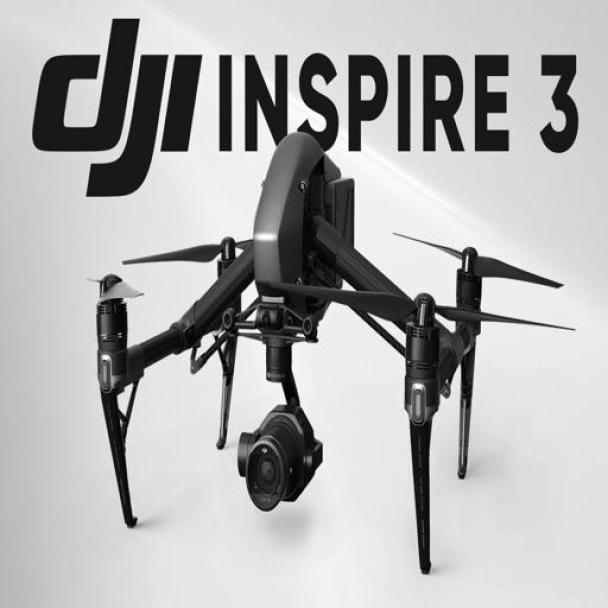

In [13]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')